In [10]:
# Data Analysis Notebook for x_dif Target Variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display plots inline
%matplotlib inline

# Increase plot resolution for retina displays
%config InlineBackend.figure_format = 'retina'


In [11]:
# Load the data
data_file = '/Users/paulj/Documents/Double_Degree_Tsinghua/Master_thesis/code/my_code/ASTGCN-2019-pytorch/data/measurements_random_poses_cleaned.csv'

# Check if the data file exists
if os.path.exists(data_file):
    df = pd.read_csv(data_file)
    print(f"Data loaded from {data_file}")
    print(f"Dataset shape: {df.shape}")
else:
    print(f"Data file {data_file} does not exist. Please check the file path.")


Data loaded from /Users/paulj/Documents/Double_Degree_Tsinghua/Master_thesis/code/my_code/ASTGCN-2019-pytorch/data/measurements_random_poses_cleaned.csv
Dataset shape: (2773, 19)


In [12]:
# Display first few rows
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


step_order     x_dif     y_dif     z_dif   rx_dif   ry_dif    rz_dif  \
0           0 -0.000182 -0.365141  1.427300  1.57005  1.56969 -0.000187   
1           1  0.010346 -0.480444  1.006320  3.10253  1.66683  1.579270   
2           2 -0.005134 -0.413612  0.846258  3.60029  1.58947  1.665010   
3           3 -0.079817 -0.454235  0.841657  3.16162  1.78563  1.717060   
4           4 -0.209376 -0.414683  1.151100  3.68361  1.40790  1.584680   

   joint_1  joint_2  joint_3  joint_4   joint_5   joint_6       x_set  \
0 -3.14159 -1.57080  0.00000 -1.57080  0.000000  0.000000  383.971412   
1 -4.08444 -2.69460  1.69873 -2.03100  0.992750 -0.067304  335.137434   
2 -3.65442 -2.82442  2.02635 -2.23002  0.148482 -0.104726  366.993514   
3 -4.46788 -2.96612  2.05675 -2.01600  1.453920 -0.021888  430.952097   
4 -4.46573 -2.37409  1.26161 -2.22417  0.799081  0.051268  555.529736   

         y_set       z_set      rx_set     ry_set     rz_set  
0 -3240.391059  200.298910  -91.749613 -21.682665 -90.157201  
1 -3133.887256 -222.167200  -87.306050 -24.393665 -89.824879  
2 -3193.509388 -380.786198  -92.666075  -0.791073 -91.414451  
3 -3126.274965 -388.703087  -79.556220 -28.424122 -85.513892  
4 -3120.965917  -73.143056 -101.859378   9.090933 -95.146109

In [13]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
step_order    0
x_dif         0
y_dif         0
z_dif         0
rx_dif        0
ry_dif        0
rz_dif        0
joint_1       0
joint_2       0
joint_3       0
joint_4       0
joint_5       0
joint_6       0
x_set         0
y_set         0
z_set         0
rx_set        0
ry_set        0
rz_set        0
dtype: int64


In [14]:
# Handling missing values (if any)
if df.isnull().sum().any():
    print("Handling missing values by dropping rows with missing values.")
    df = df.dropna()
    print(f"New dataset shape after dropping missing values: {df.shape}")
else:
    print("No missing values detected.")


No missing values detected.


In [15]:
# Define target variable and input features
target_variable = 'rz_dif'  # Your current target is x deviation
joint_features = [f'joint_{i}' for i in range(1, 7)]
setpoint_features = ['x_set', 'y_set', 'z_set', 'rx_set', 'ry_set', 'rz_set']
input_features = joint_features + setpoint_features

# Ensure all necessary columns are present
required_columns = [target_variable] + input_features
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"The following required columns are missing from the dataset: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


In [16]:
# Visualize distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df[target_variable], kde=True)
plt.title(f"Distribution of {target_variable}")
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [17]:
# Compute correlations between input features and the target variable
print("Correlation between input features and the target variable:")
corr_matrix = df[input_features + [target_variable]].corr()
corr_with_target = corr_matrix[[target_variable]].loc[input_features]
corr_with_target


Correlation between input features and the target variable:


rz_dif
joint_1 -0.028874
joint_2 -0.052385
joint_3  0.036105
joint_4  0.013756
joint_5  0.147069
joint_6 -0.012218
x_set   -0.044612
y_set    0.004774
z_set   -0.016949
rx_set   0.005485
ry_set  -0.252251
rz_set  -0.046706

In [18]:
# Visualize correlations with a bar plot
plt.figure(figsize=(10, 6))
corr_with_target_sorted = corr_with_target.sort_values(by=target_variable, ascending=False)
sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target_sorted[target_variable], palette='viridis')
plt.title(f"Correlation between Input Features and {target_variable}")
plt.xlabel("Input Features")
plt.ylabel(f"Correlation with {target_variable}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/f0/5y2fvxyx19v5c9s51q6qyp6c0000gp/T/ipykernel_95292/3752756821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target_sorted[target_variable], palette='viridis')


In [19]:
# Identify features with high correlation to the target variable
threshold = 0.3  # Adjust the threshold based on your needs
high_corr_features = corr_with_target[
    corr_with_target[target_variable].abs() > threshold
]
print(f"Features with correlation |r| > {threshold} with {target_variable}:")
high_corr_features


Features with correlation |r| > 0.3 with rz_dif:


Empty DataFrame
Columns: [rz_dif]
Index: []

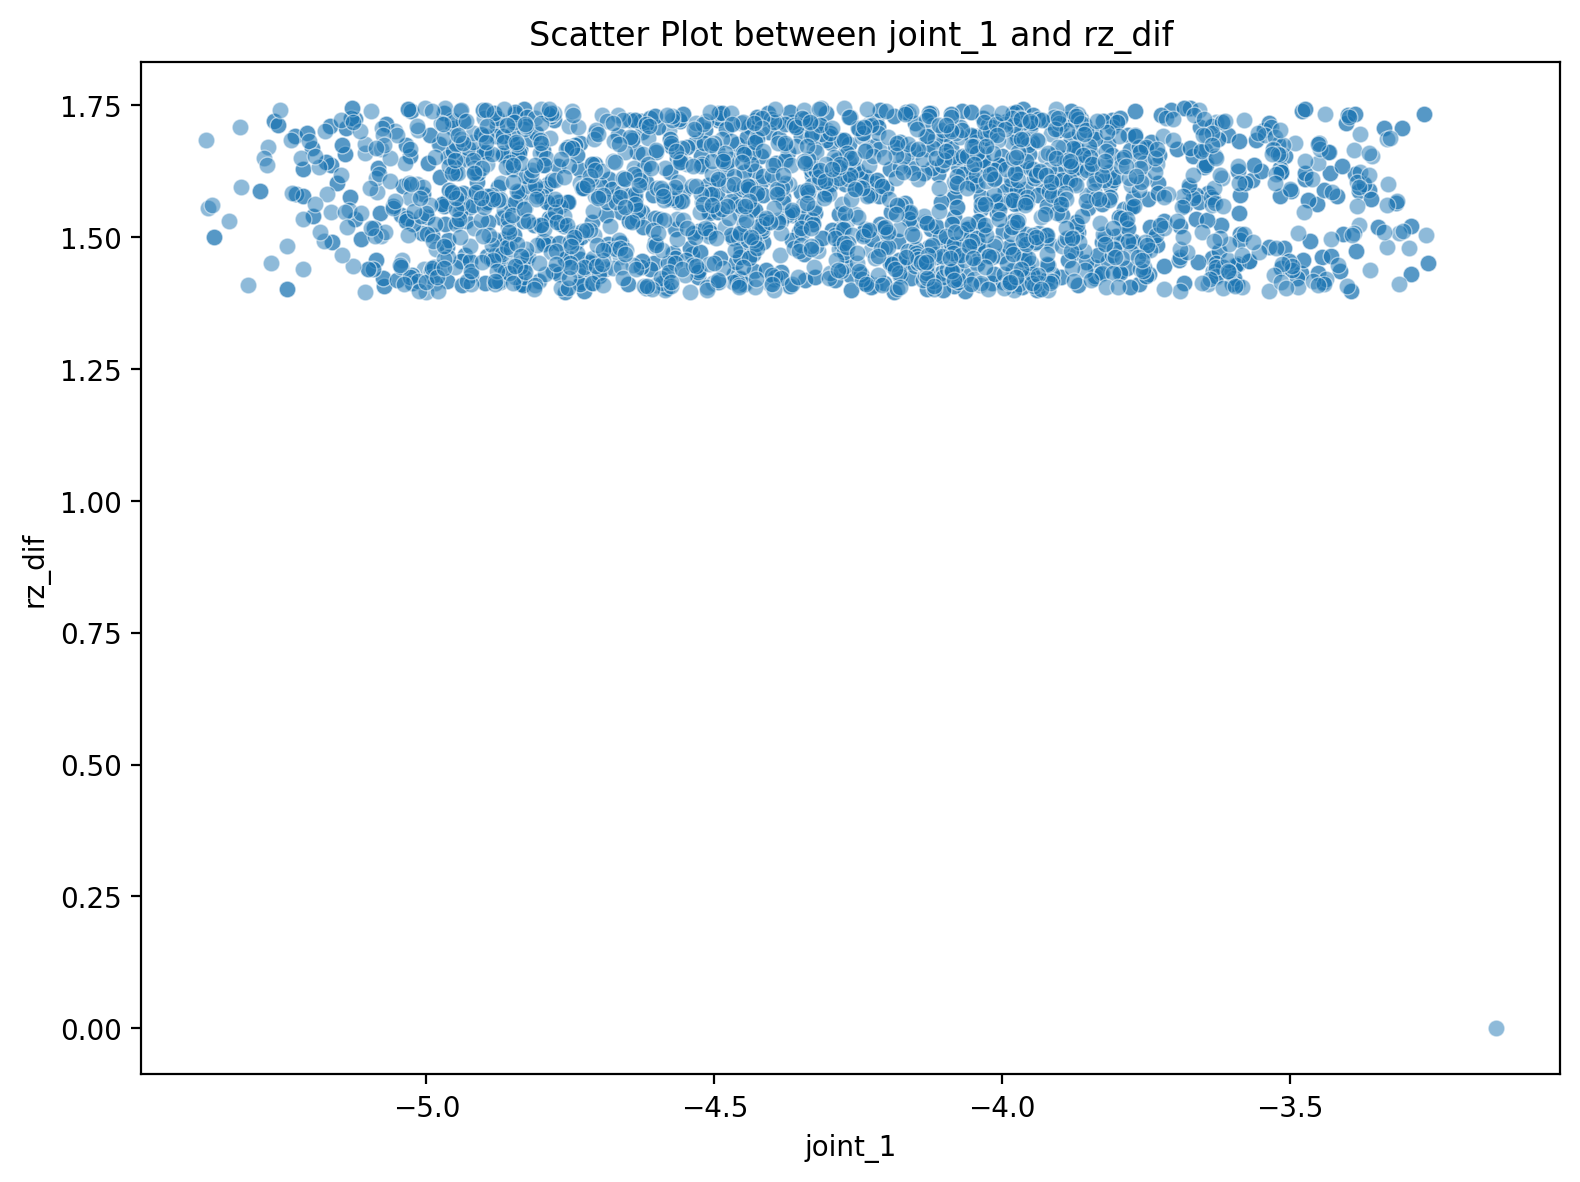

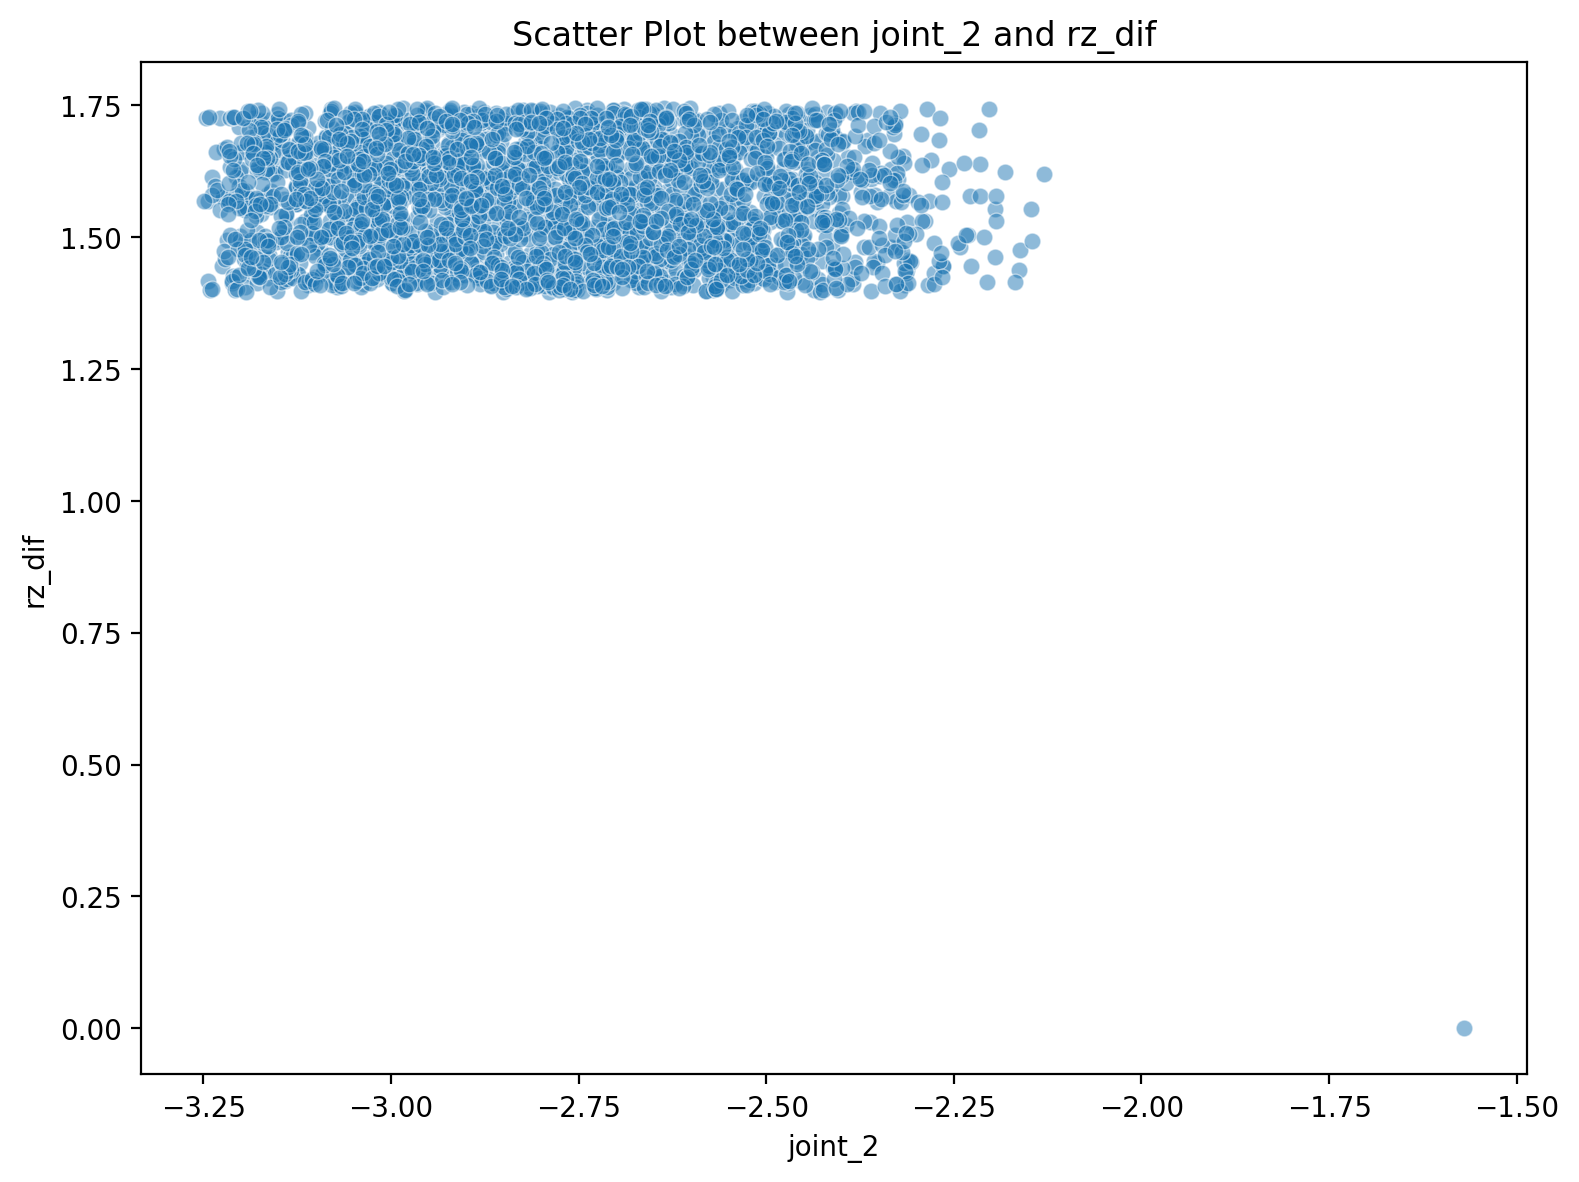

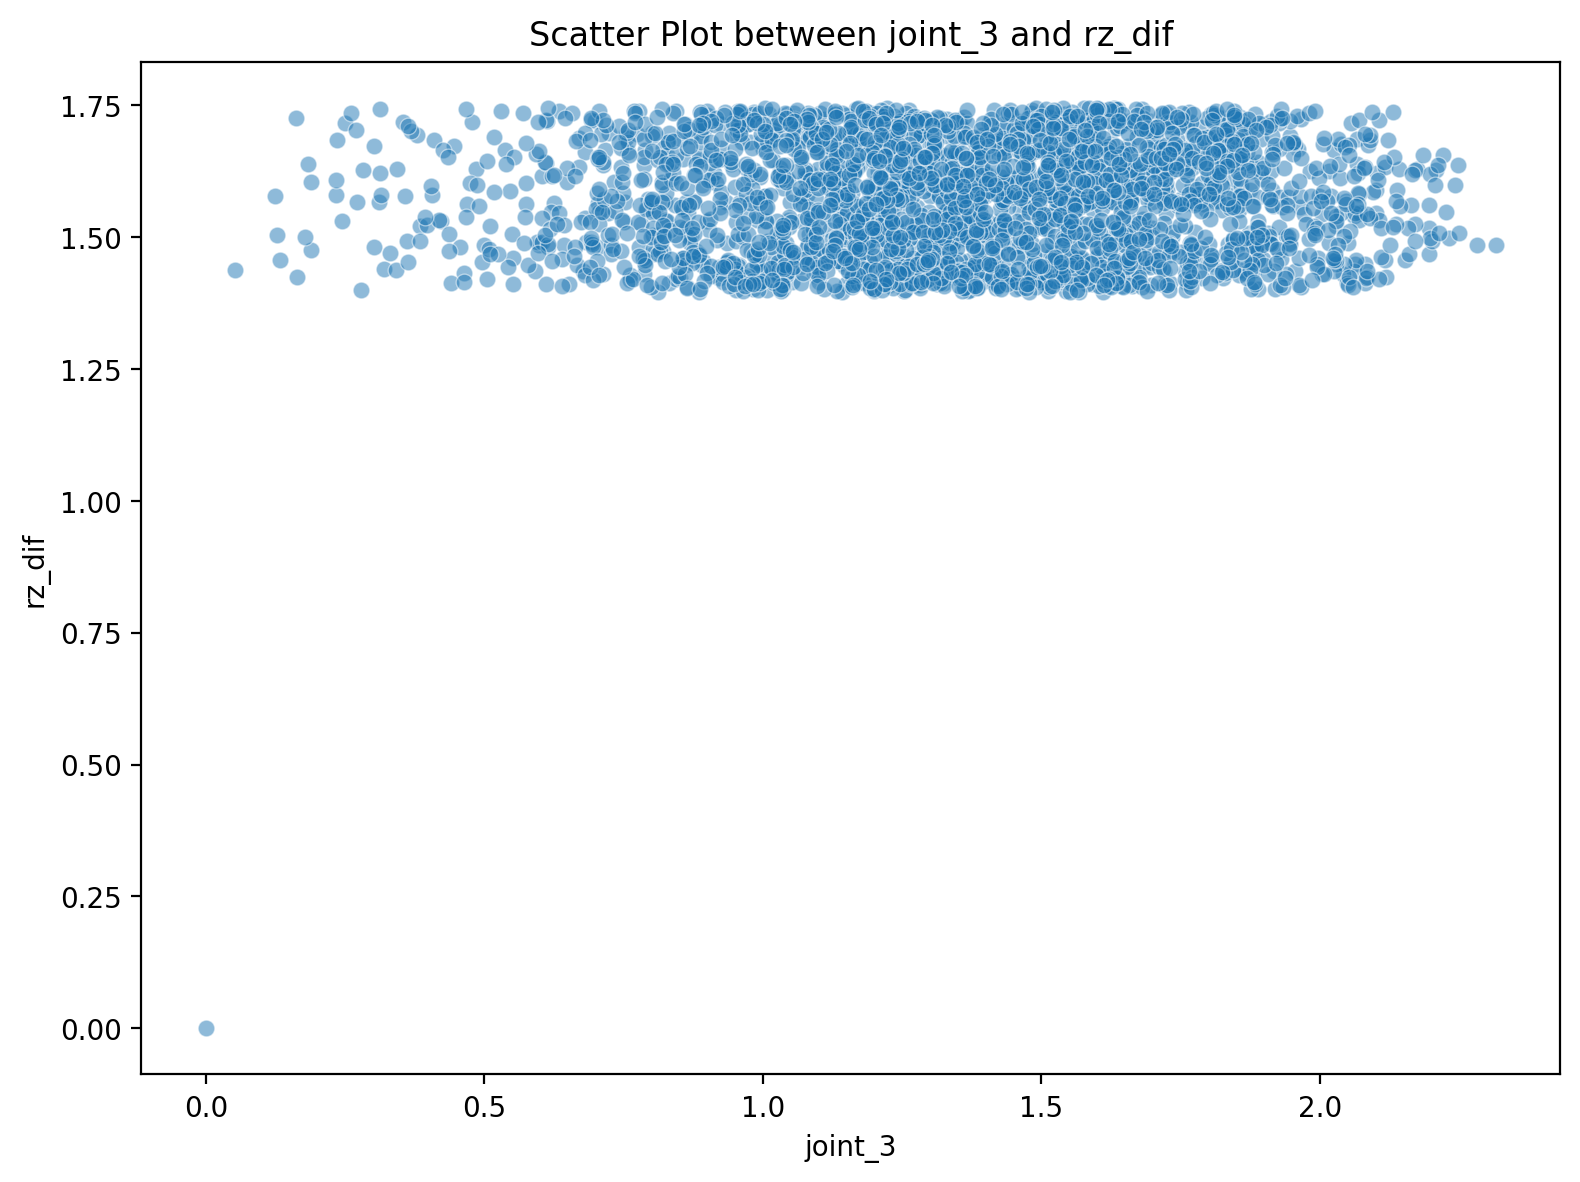

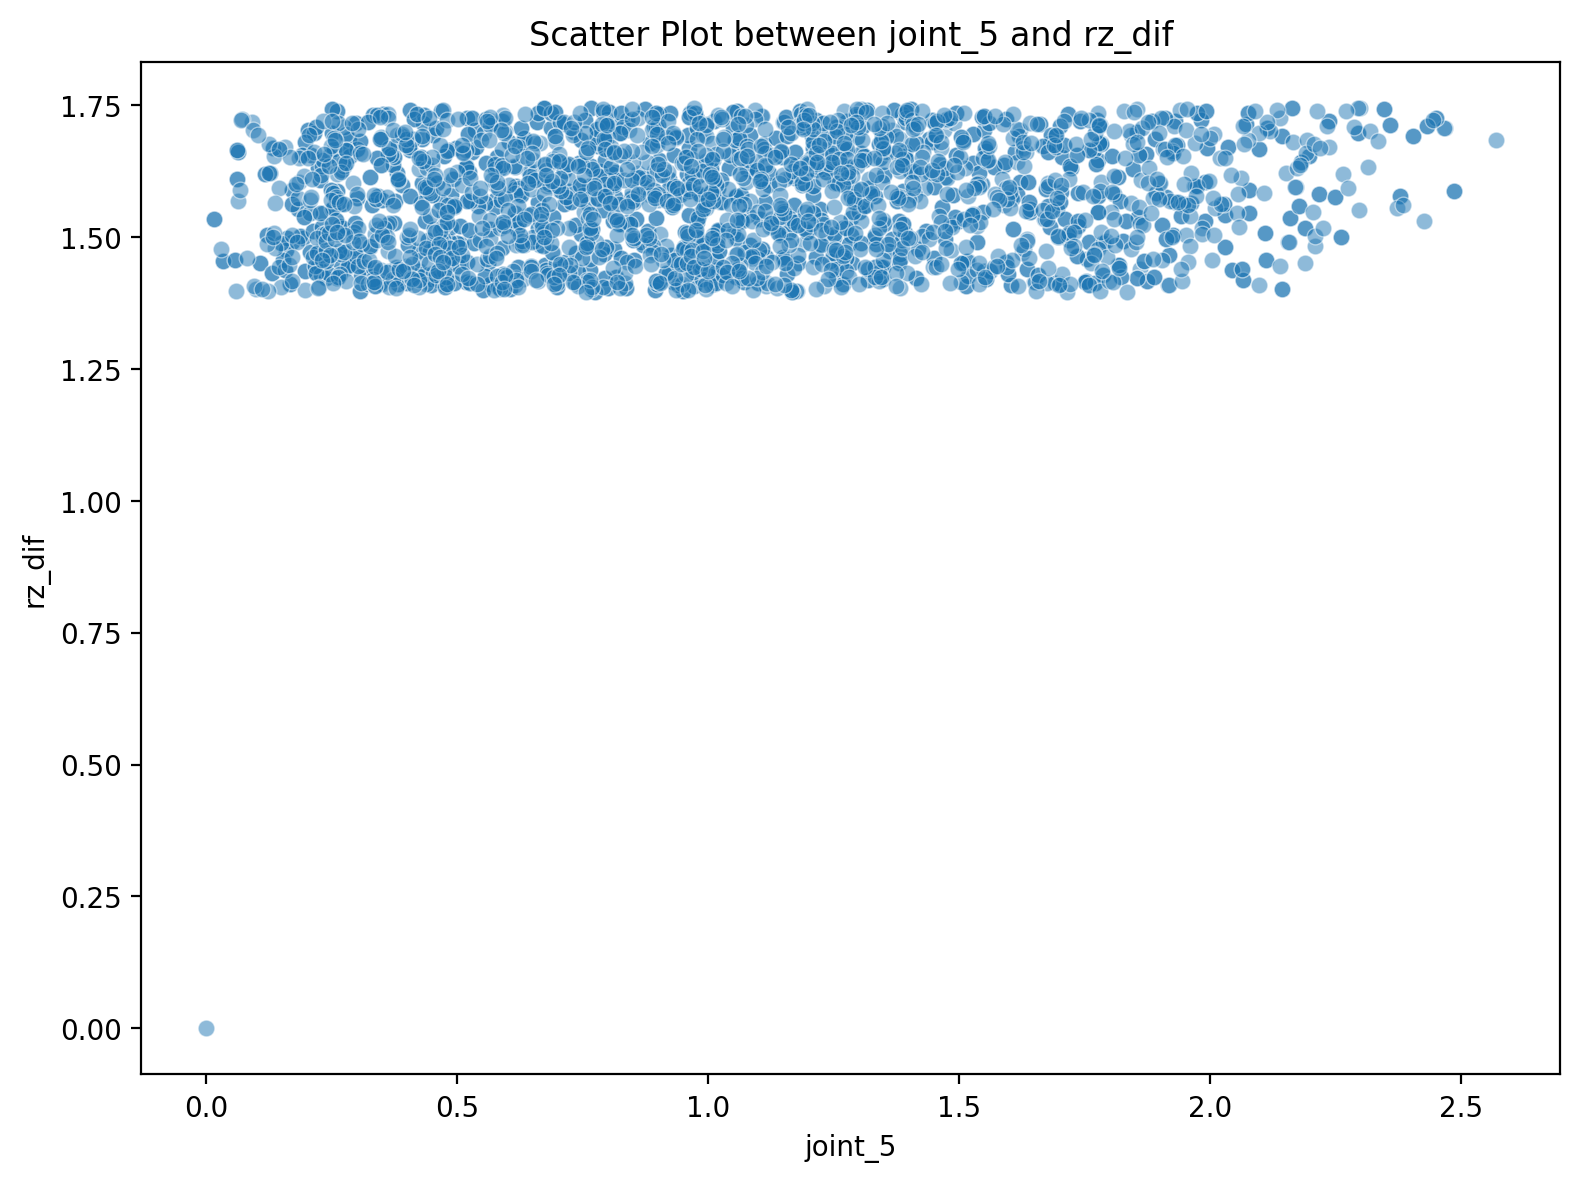

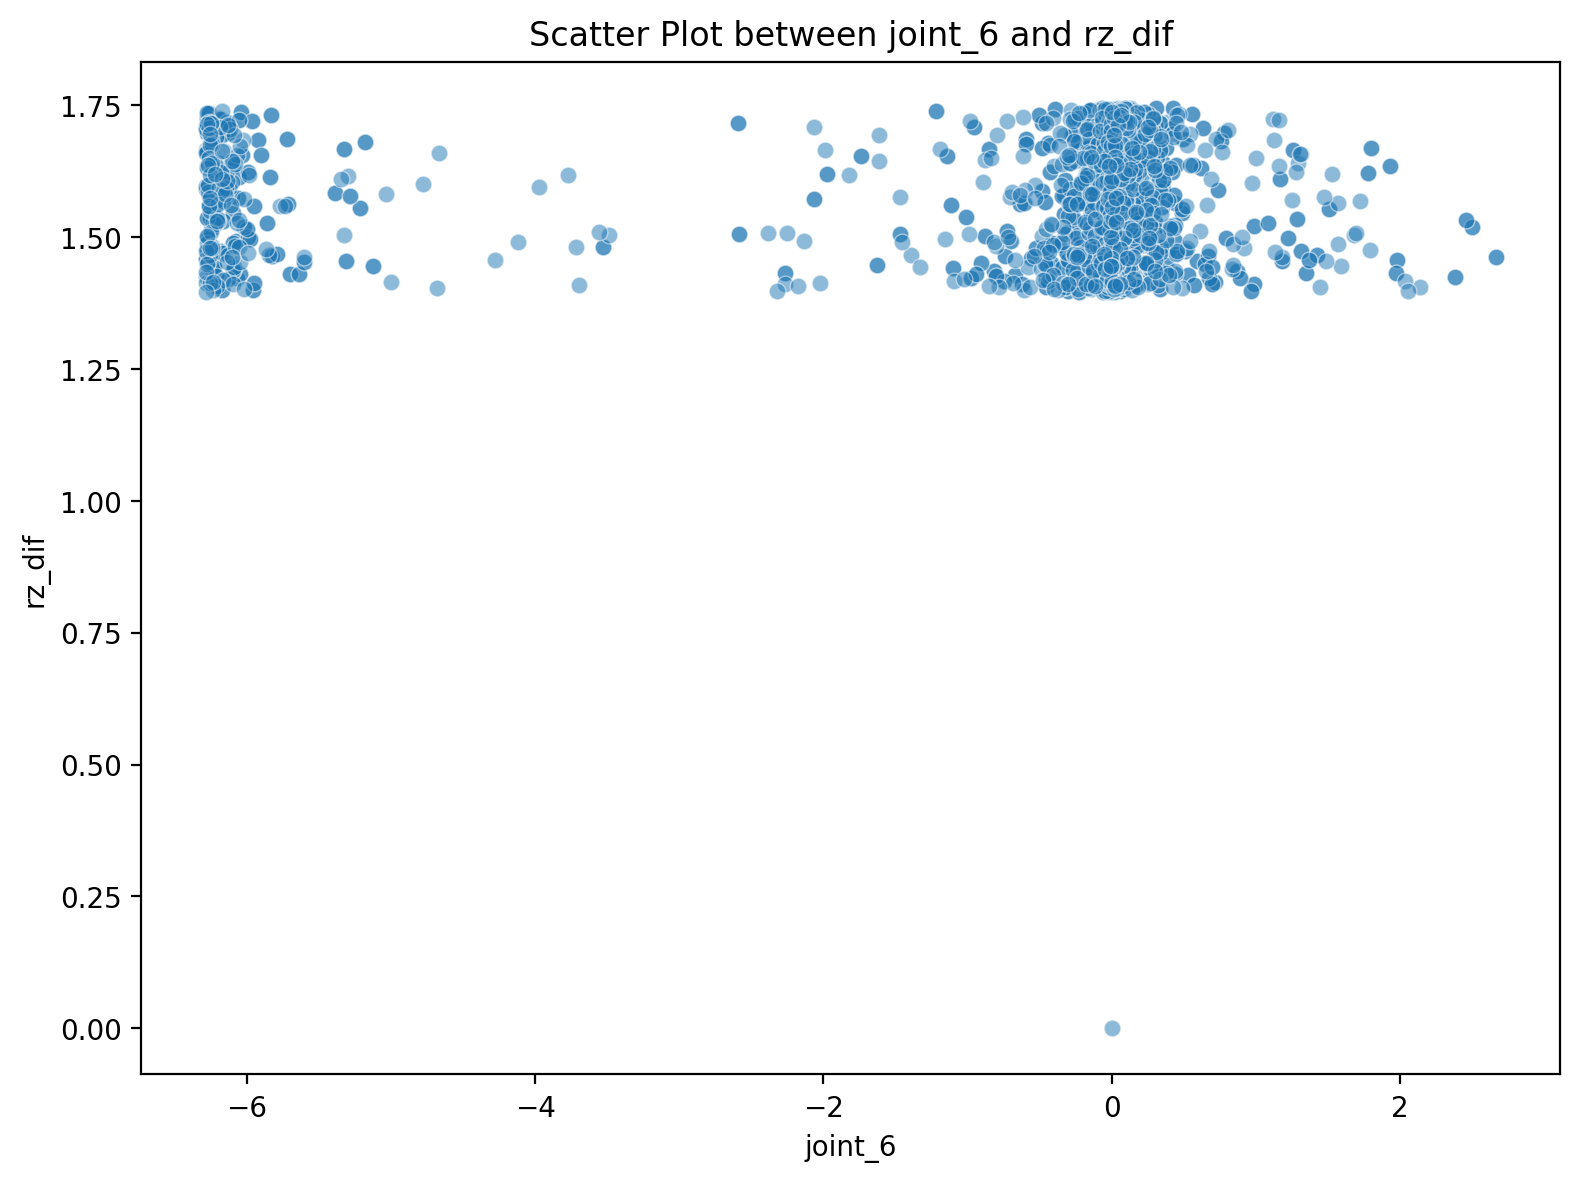

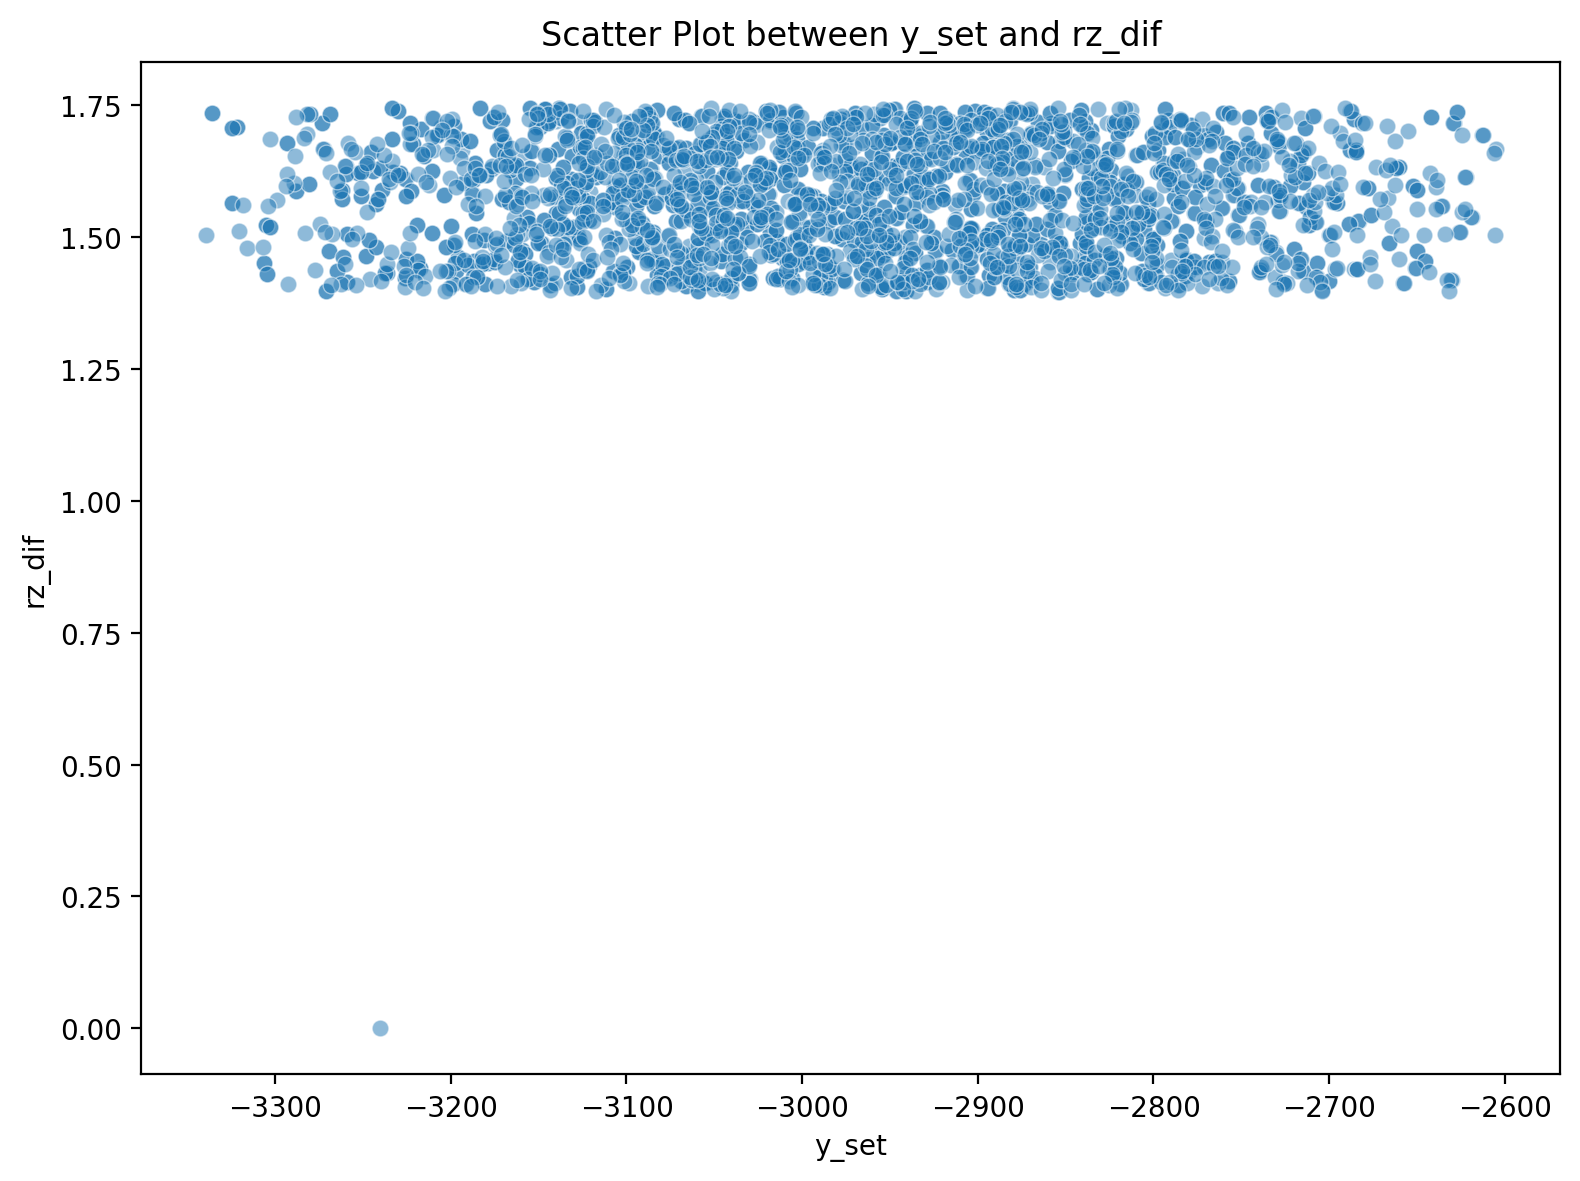

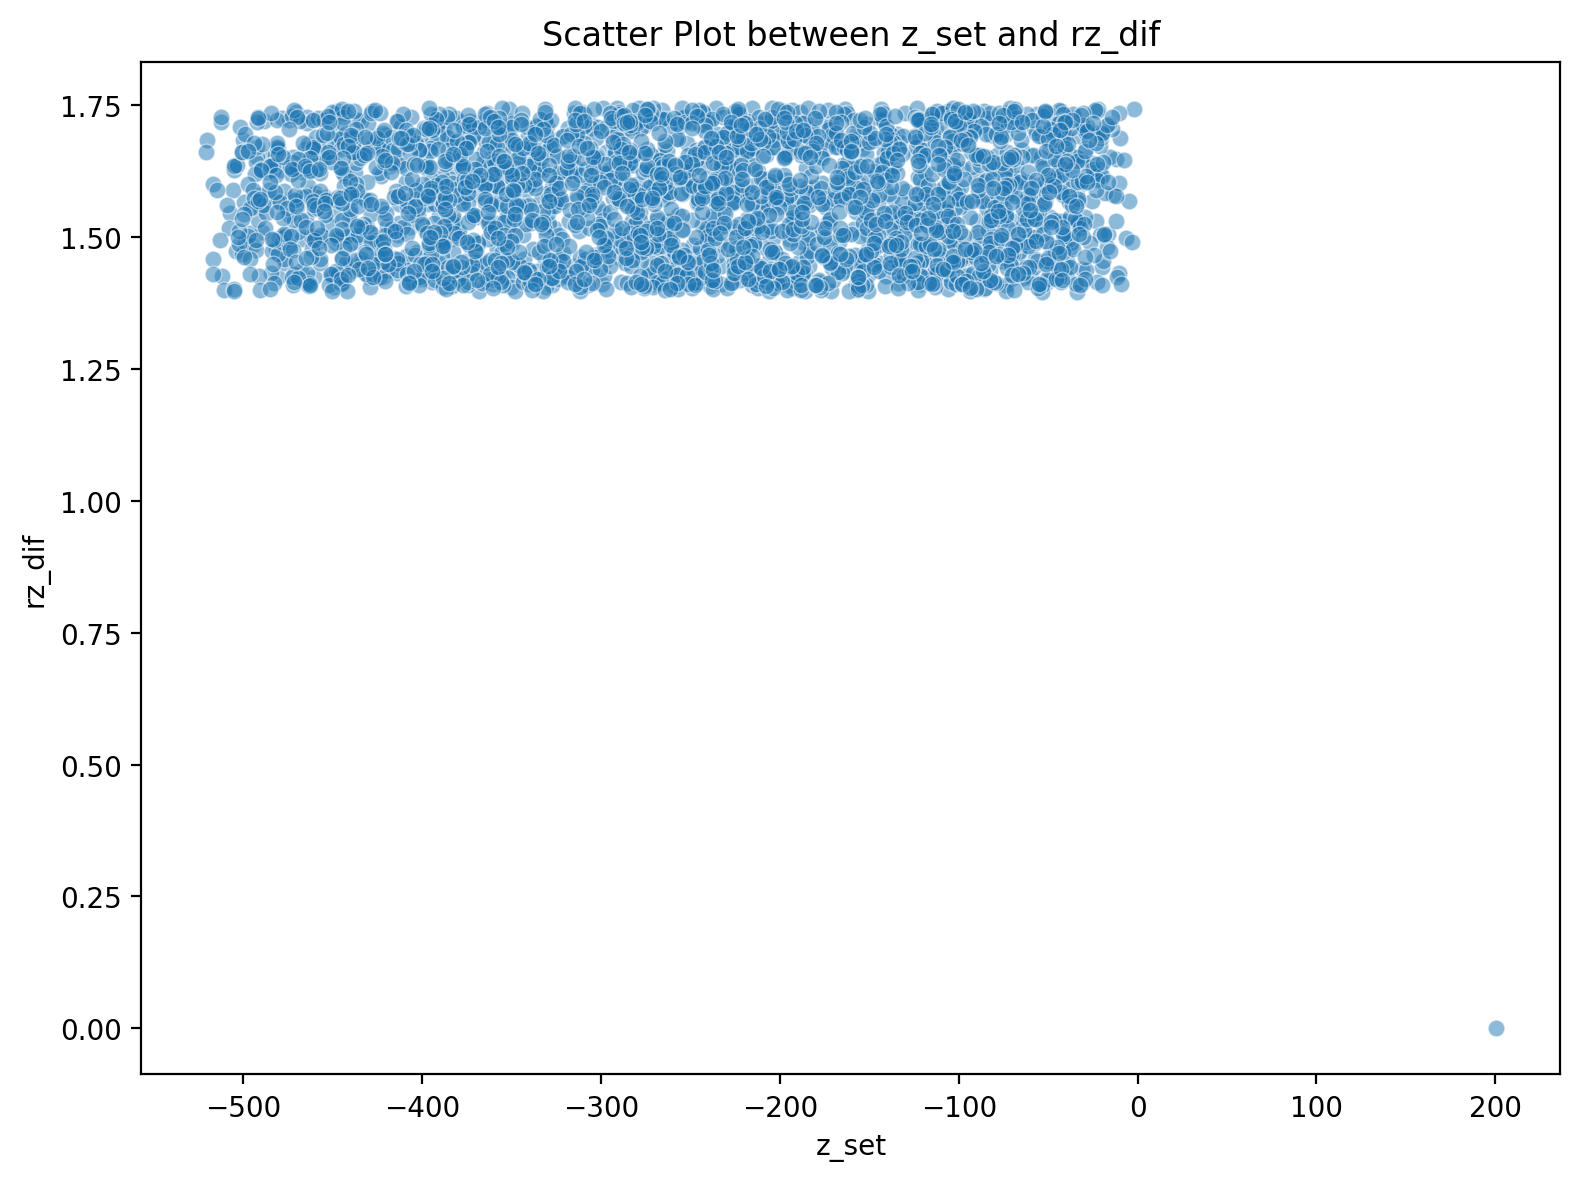

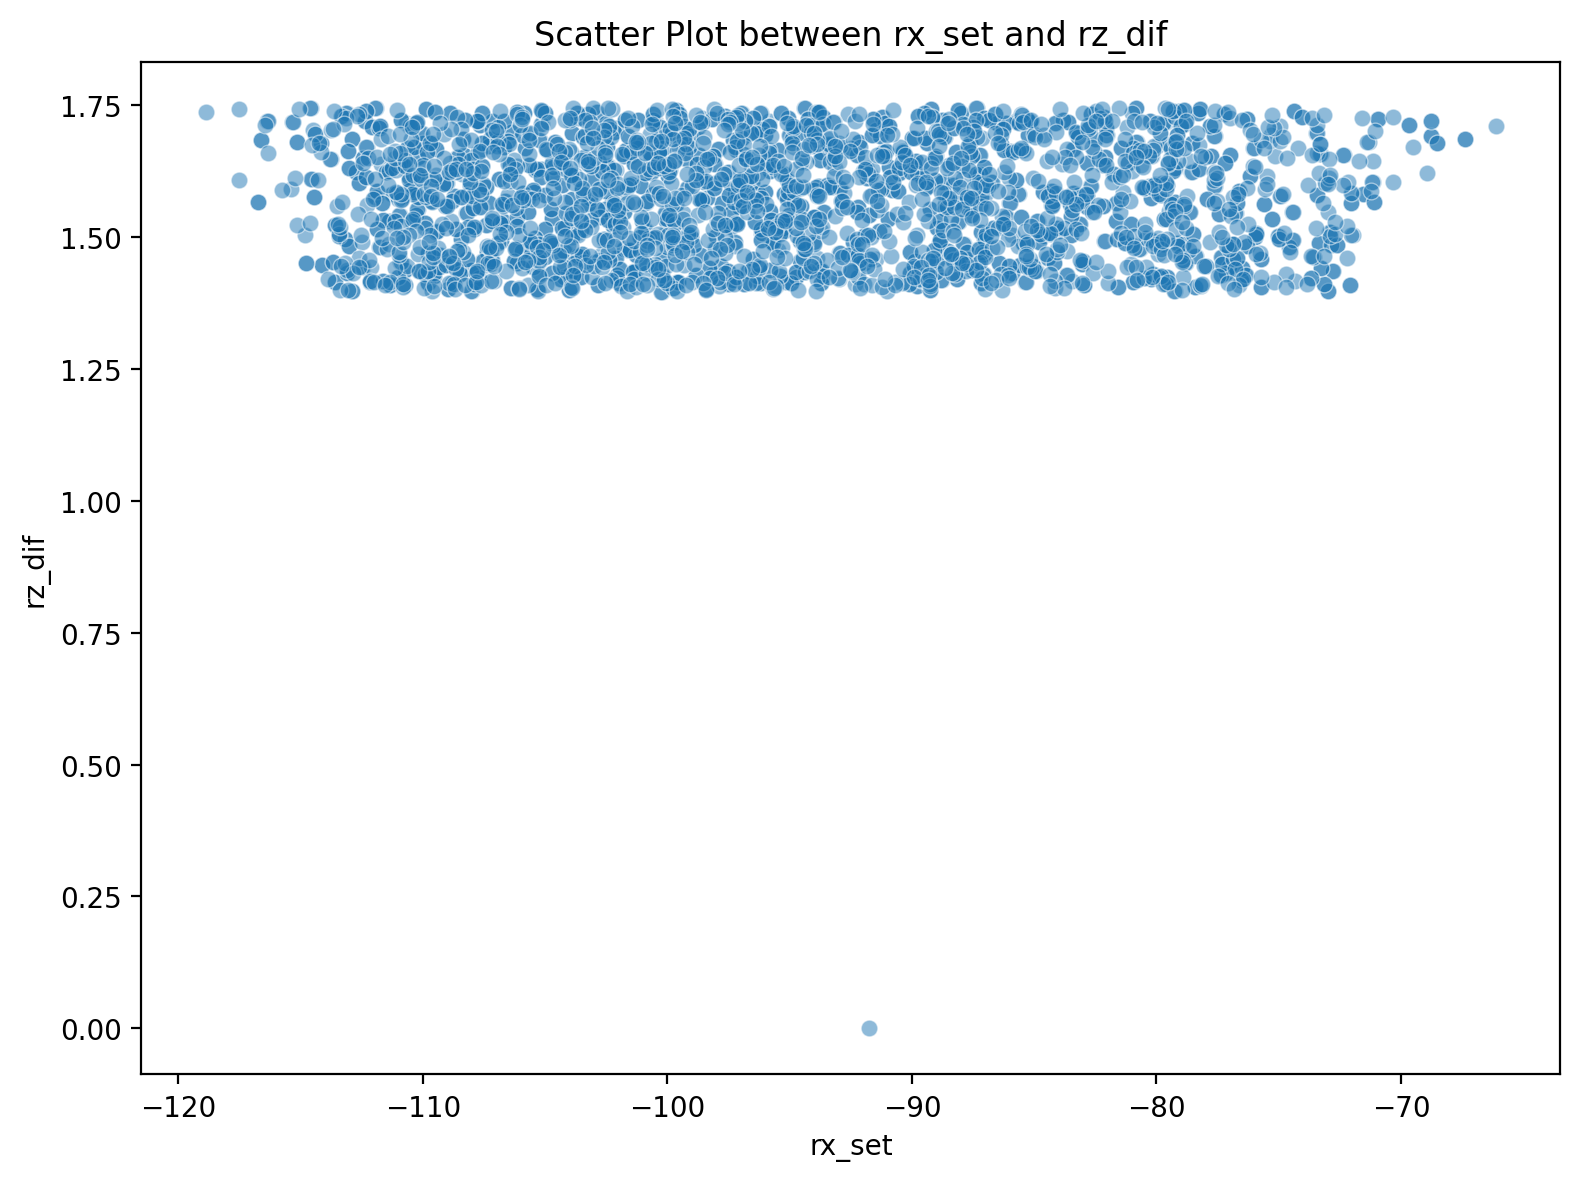

In [20]:
# Scatter plots of input features vs. target variable
for feature in input_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y=target_variable, alpha=0.5)
    plt.title(f"Scatter Plot between {feature} and {target_variable}")
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.tight_layout()
    plt.show()


In [21]:
# Pairwise correlation among input features
print("Pairwise correlation among input features:")
input_corr_matrix = df[input_features].corr()
input_corr_matrix


Pairwise correlation among input features:


joint_1   joint_2   joint_3   joint_4   joint_5   joint_6     x_set  \
joint_1  1.000000  0.099778  0.075274  0.040589 -0.853070 -0.074149 -0.837905   
joint_2  0.099778  1.000000 -0.709297 -0.049174 -0.078051  0.053339  0.000118   
joint_3  0.075274 -0.709297  1.000000 -0.080397 -0.038229 -0.028530  0.156482   
joint_4  0.040589 -0.049174 -0.080397  1.000000 -0.073031 -0.985311 -0.110640   
joint_5 -0.853070 -0.078051 -0.038229 -0.073031  1.000000  0.097972  0.648322   
joint_6 -0.074149  0.053339 -0.028530 -0.985311  0.097972  1.000000  0.085744   
x_set   -0.837905  0.000118  0.156482 -0.110640  0.648322  0.085744  1.000000   
y_set   -0.674557 -0.174937 -0.392441  0.078936  0.496357  0.021270  0.318181   
z_set   -0.070414  0.899157 -0.794315 -0.014200  0.066973  0.067283  0.047446   
rx_set  -0.079618 -0.221569  0.035633  0.013958  0.078756  0.079872  0.070553   
ry_set   0.096395  0.026155 -0.069528  0.075693 -0.585738 -0.071076  0.063320   
rz_set  -0.095776 -0.192962  0.008296  0.019583  0.075354  0.075688  0.088855   

            y_set     z_set    rx_set    ry_set    rz_set  
joint_1 -0.674557 -0.070414 -0.079618  0.096395 -0.095776  
joint_2 -0.174937  0.899157 -0.221569  0.026155 -0.192962  
joint_3 -0.392441 -0.794315  0.035633 -0.069528  0.008296  
joint_4  0.078936 -0.014200  0.013958  0.075693  0.019583  
joint_5  0.496357  0.066973  0.078756 -0.585738  0.075354  
joint_6  0.021270  0.067283  0.079872 -0.071076  0.075688  
x_set    0.318181  0.047446  0.070553  0.063320  0.088855  
y_set    1.000000  0.043220  0.036527  0.060051  0.053902  
z_set    0.043220  1.000000  0.057715 -0.033664  0.072264  
rx_set   0.036527  0.057715  1.000000 -0.046246  0.958144  
ry_set   0.060051 -0.033664 -0.046246  1.000000 -0.011356  
rz_set   0.053902  0.072264  0.958144 -0.011356  1.000000

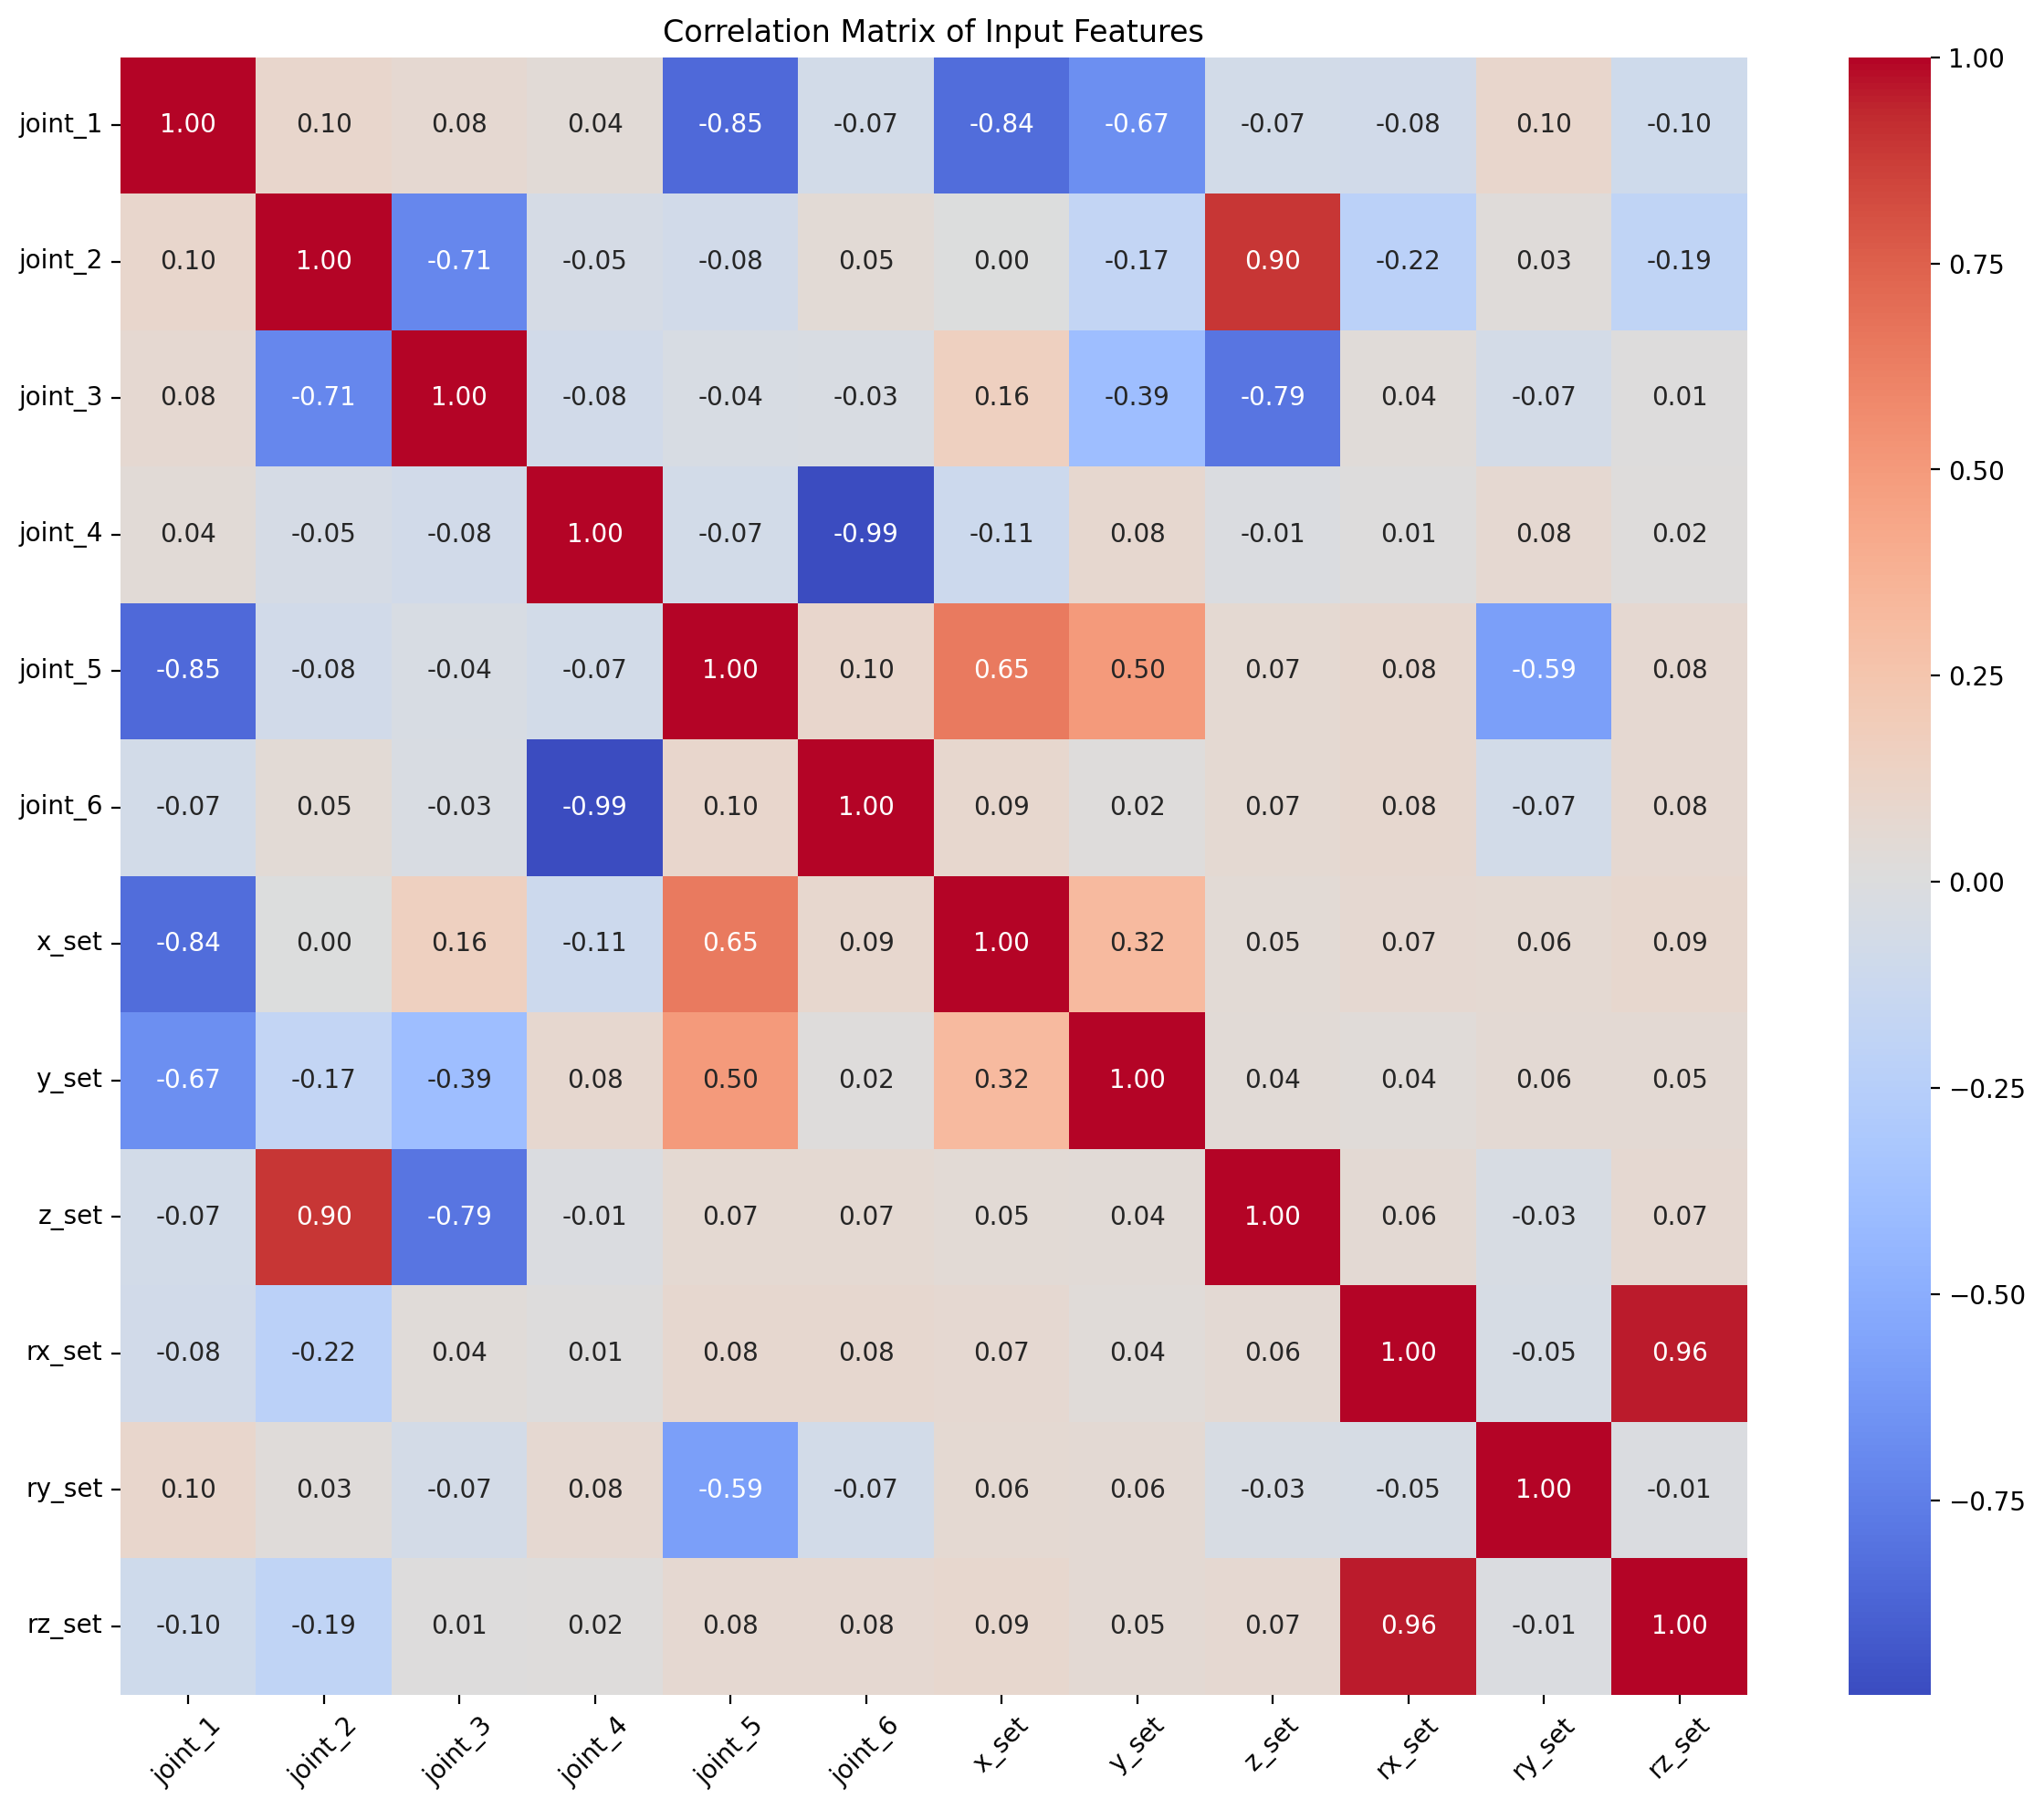

In [22]:
# Visualize input feature correlations with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(input_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Input Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
# Check for multicollinearity among input features
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Calculating Variance Inflation Factor (VIF) for input features:")

# Prepare data for VIF calculation
X = df[input_features]
X = X.assign(constant=1)  # Add a constant term for intercept

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]

# Remove the constant term from VIF data
vif_data = vif_data[vif_data['Feature'] != 'constant']
vif_data = vif_data.reset_index(drop=True)
vif_data


Calculating Variance Inflation Factor (VIF) for input features:


Feature         VIF
0   joint_1   91.449725
1   joint_2   37.822666
2   joint_3   43.173302
3   joint_4  700.662421
4   joint_5  106.669757
5   joint_6  688.533582
6     x_set   13.685496
7     y_set    8.612481
8     z_set   20.896731
9    rx_set   16.015995
10   ry_set   30.515558
11   rz_set   13.371568

In [24]:
# Identify features with high VIF
high_vif = vif_data[vif_data['VIF'] > 5]
print("Features with VIF > 5 (indicating multicollinearity):")
high_vif


Features with VIF > 5 (indicating multicollinearity):


Feature         VIF
0   joint_1   91.449725
1   joint_2   37.822666
2   joint_3   43.173302
3   joint_4  700.662421
4   joint_5  106.669757
5   joint_6  688.533582
6     x_set   13.685496
7     y_set    8.612481
8     z_set   20.896731
9    rx_set   16.015995
10   ry_set   30.515558
11   rz_set   13.371568

In [25]:
# Box plot to identify outliers in the target variable
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[target_variable])
plt.title(f"Box Plot of {target_variable}")
plt.xlabel(target_variable)
plt.tight_layout()
plt.show()
